<a href="https://colab.research.google.com/github/rburakkorkmaz/CSE-406_Scientific-Programming/blob/main/Korkmaz_RamazanBurak_E5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><strong>Exercise 5</strong></h1>
<h1><strong>Student Name & Surname:</strong> Ramazan Burak Korkmaz</h1>
<h1><strong>Student ID:</strong> 202151056004</h1>

<h2>Needed packages</h2>

In [168]:
import numpy as np
import random
from scipy.optimize import least_squares, fmin
from scipy.spatial.distance import cdist
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import pandas as pd
import math

<h1><strong>Exercise 9.5:</strong> Singular values</h1>
Generate an nxn matrix, denoted by C, where each entry is 1 with probability p and 0 otherwise. Use the linear algebra library of Scipy to compute the singular values of C. What can you say about the relationship between n, p and the largest singular value?



<h2> Largest singular value of a matrix C is almost same with n x p. </h2>

In [169]:
# For loop to simulate different sizes
for n in range(10, 110, 20):
  # For loop to simulate different p probability
  for i in range(0, 11, 1):
    # Create C matrix with current n and p values.
    C = np.random.binomial(n=1, p=i/10, size=(n, n))
    # Scipy library svd function to find singular values of matrix C
    U, s, Vh = np.linalg.svd(C)
    # Print p, n and s values to compare
    print(f"p = {i/10}")
    print(f"n = {n}")
    print(f"s = {s[0]}")
    print("-----------------------------------------------------------------------------")

p = 0.0
n = 10
s = 0.0
-----------------------------------------------------------------------------
p = 0.1
n = 10
s = 2.1357792050698565
-----------------------------------------------------------------------------
p = 0.2
n = 10
s = 2.574126946539232
-----------------------------------------------------------------------------
p = 0.3
n = 10
s = 3.6410106386074084
-----------------------------------------------------------------------------
p = 0.4
n = 10
s = 4.587002870020242
-----------------------------------------------------------------------------
p = 0.5
n = 10
s = 5.8154501354342045
-----------------------------------------------------------------------------
p = 0.6
n = 10
s = 5.741957937438438
-----------------------------------------------------------------------------
p = 0.7
n = 10
s = 8.225453841812241
-----------------------------------------------------------------------------
p = 0.8
n = 10
s = 7.627367612867192
------------------------------------------------------

<h1><strong>Exercise 10.1:</strong> Least squares</h1>
Generate matrix A ∈ Rᵐ×ⁿ with m > n.  Also generate some vector b ∈ Rᵐ.

Now find x = arg minₓ /Ax − b/₂.

Print the norm of the residual.




In [170]:
# Dimensions of the matrix
m = 50
n = 40

In [171]:
# Creating A and b matrices.
# Values of these matrices are between -100 and 100
A = np.random.randint(-100, 100, size = (m, n))
b = np.random.randint(-100, 100, size = m)

print(A)
print(b)

[[-56  28  53 ... -52  82  -1]
 [-71  39 -85 ...  63  21  54]
 [-75  73 -29 ...  50  93 -87]
 ...
 [ 61   4  80 ...  63 -42 -34]
 [  4  -3 -19 ...  31  78  16]
 [ 66 -84 -76 ... -85  57 -36]]
[-30 -76  70 -20 -51 -37  47   9  79  88 -34 -56  94 -18 -86 -97  47  -1
 -69  42 -56  69  49  23  15  41  22 -87  25 -47  22  43 -97  98  27 -68
  26  52  40 -84  -2  90 -64 -92 -21  19  35 -28 -24  45]


In [172]:
# A function that returns result of Ax-b equation
def fun(x):
  return A@x - b

In [173]:
# Create a initial x matrix to start with
x = np.random.randint(-100, 100, size = n)

# Calculate residuals by scipy least_squares function
res = least_squares(fun, x)

print(res.optimality)

3.899071998603176e-08


<h1><strong>Exercise 10.2:</strong> Optimization</h1>
Find the maximum of the function

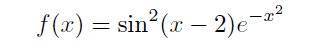





In [174]:
# Negative of the given function. Negative because we are trying to find maximum
# value of the function, therefore we get the negative of the function and 
# try to find min value instead.
def negative_f(x):
  return -1 * (math.sin(x -2) ** 2) * math.exp(-1 * (x ** 2))

In [175]:
max_x = fmin(negative_f, 0)
print(max_x)

Optimization terminated successfully.
         Current function value: -0.911685
         Iterations: 20
         Function evaluations: 40
[0.21625]


<h1><strong>Exercise 10.3:</strong> Pairwise distances</h1>
Let X  be a matrix with n rows and m columns.  How can you compute the pairwise distances between every two rows?

As  an  example  application,  consider  n cities,  and  we  are  given  their  coordinates  in two  columns.  Now we want a nice table that tells us for each two cities, how far they are apart.

Again, make sure you make use of Scipy’s functionality instead of writing your own routine.






In [176]:
# Creating a X matrix that has values between -100 and 100 with size of (n, m)
X = np.random.randint(-100, 100, size = (n, m))

In [177]:
# Print X matrix we just created
print(X)

[[ 91  17 -17 ...  28  -3 -94]
 [  3 -19  27 ... -17 -46 -70]
 [-72  57 -21 ...  -6  22  36]
 ...
 [-45   3  47 ...  63  30  63]
 [-23  32 -46 ... -61  15  81]
 [ 40 -69  54 ...  71 -47  -2]]


In [178]:
# Calculate distance of two rows pair
dm = cdist(X, X, 'euclidean')

In [179]:
# Print raw array of distances
print(dm)

[[  0.         568.27458152 549.33596278 ... 696.96628326 573.45531648
  577.34565037]
 [568.27458152   0.         587.22738356 ... 615.92532015 602.26987306
  576.9558042 ]
 [549.33596278 587.22738356   0.         ... 532.13907956 621.89950957
  621.01690798]
 ...
 [696.96628326 615.92532015 532.13907956 ...   0.         543.5669232
  500.81333848]
 [573.45531648 602.26987306 621.89950957 ... 543.5669232    0.
  570.0622773 ]
 [577.34565037 576.9558042  621.01690798 ... 500.81333848 570.0622773
    0.        ]]


In [180]:
# Table view with pandas Dataframe
pd.set_option('display.width', dm.shape[0] * dm.shape[1])
print(pd.DataFrame(dm))

            0           1           2           3           4           5           6           7           8           9           10          11          12          13          14          15          16          17          18          19          20          21          22          23          24          25          26          27          28          29          30          31          32          33          34          35          36          37          38          39
0     0.000000  568.274582  549.335963  569.469929  601.457397  548.556287  501.648283  603.024046  567.896998  562.841008  629.514098  647.976851  608.076475  535.213976  557.043086  671.895825  586.448634  536.716871  572.993892  629.123994  594.265934  705.644386  562.112978  634.898417  594.494743  570.639115  521.406751  649.412812  564.655647  652.569537  647.068775  547.759984  550.411664  579.946549  638.818441  496.568223  560.242805  696.966283  573.455316  577.345650
1   568.274582    0.000000  587.22

<h1><strong>Exercise 11.1:</strong> Plotting a function</h1>

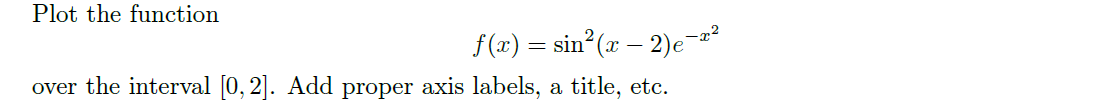







In [181]:
# Creating a function to return result of the function above
def func_body(x):
  return (math.sin(x -2) ** 2) * math.exp(-1 * (x ** 2))

In [182]:
# We vectorize the func_body so we can use it in plot function.
# Otherwise we get error
f = np.vectorize(func_body)

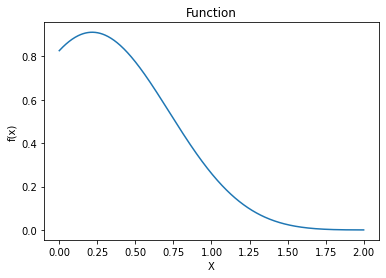

In [183]:
# Creating a equally spaced X axis vector, so we can
# plot our function
x_axis = np.linspace(0, 2, 500)

# Plot
plt.plot(x_axis, f(x_axis))
plt.title("Function")
plt.xlabel("X")
plt.ylabel("f(x)")

plt.show()

<h1><strong>Exercise 11.3:</strong> Histogram and density estimation</h1>
Generate a vector z of 10000 observations from your favorite exotic distribution. Then make a plot that
shows a histogram of z (with 25 bins), along with an estimate for the density, using a Gaussian kernel
density estimator (see scipy.stats). See Figure 2 for an example plot.






In [184]:
# Creating a Gaussian Distrubition
mu, sigma = 0.8, 0.15
s = np.random.normal(mu, sigma, 10000)

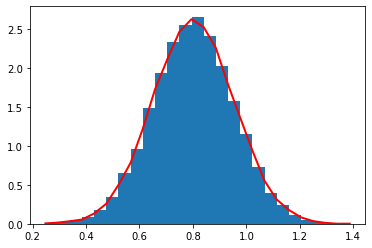

In [185]:
# Plot histogram
count, bins, ignored = plt.hist(s, 25, density=True)

# Creating a density function with gaussian kernel distrubition estimator func.
density = gaussian_kde(s)

# Plot density function over histogram
plt.plot(bins, density(bins), linewidth=2, color='r')

# Show plot
plt.show()